## 🎲 Python Lab: Supervised Learning - Classification
Linear Discriminant Analysis (LDA) <br>
Quadratic Discriminant Analysis (QDA)
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 7 - April 12, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week07/02_LDA_QDA_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week07/02_LDA_QDA_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Load and Visualize the Iris Dataset

We'll focus on two features: petal length and petal width.

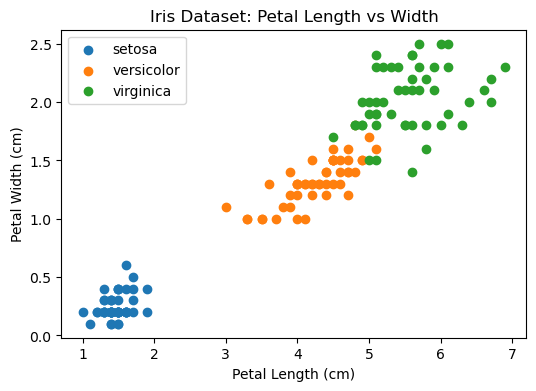

In [6]:
iris = load_iris()
X = iris.data[:, 2:]  # Select petal length (index 2) and petal width (index 3)
y = iris.target

# Visualize the data
plt.figure(figsize=(6, 4))
for c in np.unique(y):
    plt.scatter(X[y == c, 0], X[y == c, 1], label=iris.target_names[c])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Iris Dataset: Petal Length vs Width')
plt.show()

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Utility Function for Visualization
def plot_decision_boundaries(X, y, predict_func, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(grid)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    for c in np.unique(y):
        plt.scatter(X[y == c, 0], X[y == c, 1], label=iris.target_names[c])
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.title(title)
    plt.show()

## 🧠 Understanding the Theory: LDA and QDA

Both LDA and QDA are based on Bayes' theorem:

$$
P(y=k \mid x) = \frac{P(x \mid y=k) P(y=k)}{P(x)}
$$

Where:
- $ P(y=k \mid x) $ is the posterior probability that sample $ x $ belongs to class $ k $
- $ P(x \mid y=k) $ is the likelihood of $ x $ given class $ k $
- $ P(y=k) $ is the prior probability of class $ k $
- $ P(x) $ is the evidence (normalization factor)

For Gaussian data, $ P(x \mid y=k) $ is modeled as a multivariate Gaussian:

$$
P(x \mid y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right)
$$

Where:
- $ d $ is the number of features
- $ \mu_k $ is the mean vector for class $ k $
- $ \Sigma_k $ is the covariance matrix for class $ k $


**LDA**: Assumes all classes share the same covariance matrix ($ \Sigma_k = \Sigma $ for all $ k $) <br>
**QDA**: Each class has its own covariance matrix ($ \Sigma_k $ can be different for each $ k $)

## 2️⃣ Implementing LDA from Scratch

LDA assumes all classes share the same covariance matrix, leading to linear decision boundaries.

For a $K$-class problem with features $X$, the LDA classifier predicts the class with the highest posterior probability:

$$\hat{y} = \arg\max_k P(Y=k|X=x)$$

Using Bayes' theorem and taking the log, we get the discriminant function:

$$\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log(\pi_k)$$

where:
- $\mu_k$ is the mean vector of class $k$
- $\Sigma$ is the shared covariance matrix
- $\pi_k$ is the prior probability of class $k$

> **TODO**: Compute the mean for each class <br>
> _Hint_: Use `np.unique` to get class labels, then compute means with `np.mean`

In [11]:
def compute_class_means(X, y):
    pass

> **TODO**: Compute the pooled (shared) covariance matrix <br>
> _Hint_: Sum the scatter matrices for each class, divide by `(n_samples - n_classes)`

In [13]:
def compute_pooled_covariance(X, y, means):
    pass

    # TODO:
    # classes = np.unique(y)
    # n_features = X.shape[1]
    # covariance = np.zeros((n_features, n_features))
    # for c in classes:
    #     X_c = X[y == c]
    #     for x in X_c:
    #         diff = (x - means[c]).reshape(-1, 1)
    #         covariance = ...
    # n_samples = X.shape[0]
    # n_classes = len(classes)
    # covariance = ...
    # return covariance

> **TODO**: Compute the prior probabilities <br>
> _Hint_: Use `np.unique` with `return_counts=True`, then divide counts by total samples

In [15]:
def compute_priors(y):
    pass

    # TODO:
    # classes, counts = ...
    # priors = {c: count / len(y) for c, count in zip(...)}
    # return priors

> **TODO**: Compute the discriminant function delta <br>
> _Hint_: `delta = x^T * inv_cov * mu - 0.5 * mu^T * inv_cov * mu + log(pi)`

In [17]:
def predict_lda(X, means, covariance, priors):
    pass

    # TODO:
    # classes = list(means.keys())
    # inv_cov = np.linalg.inv(covariance)
    # predictions = []
    # for x in X:
    #     deltas = []
    #     for c in classes:
    #         mu = means[c]
    #         pi = priors[c]
    #         # delta = ... 
    #         deltas.append(delta)
    #     pred = classes[np.argmax(deltas)]
    #     predictions.append(pred)
    # return np.array(predictions)

In [18]:
# Fit and Evaluate LDA
means = compute_class_means(X_train, y_train)
covariance = compute_pooled_covariance(X_train, y_train, means)
priors = compute_priors(y_train)
y_pred_lda = predict_lda(X_test, means, covariance, priors)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy (from scratch): {accuracy_lda:.4f}")

LDA Accuracy (from scratch): 1.0000


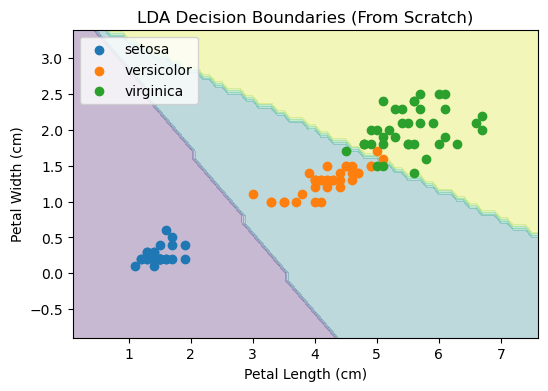

In [19]:
# Visualize LDA Decision Boundaries
plot_decision_boundaries(X_train, y_train, 
                         lambda X: predict_lda(X, means, covariance, priors),
                         "LDA Decision Boundaries (From Scratch)")

## 3️⃣ Implementing QDA from Scratch

Unlike LDA, QDA allows each class to have its own covariance matrix, resulting in quadratic decision boundaries.

The QDA discriminant function is:

$$\delta_k(x) = - \frac{1}{2}\log|\Sigma_k| - \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + \log(\pi_k) $$

where $\Sigma_k$ is the covariance matrix for class $k$.

> **TODO**: Compute covariance matrix for each class <br>
> _Hint_: Use `np.cov` on samples of each class (`rowvar=False`)

In [22]:
def compute_class_covariances(X, y, means):
    pass

    # TODO:
    # classes = np.unique(y)
    # covariances = {}
    # for c in classes:
    #     X_c = X[y == c]
    #     covariances[c] = ...
    # return covariances

> **TODO**: Compute the discriminant function delta <br>
> _Hint_: `delta = -0.5 * log(det_cov) - 0.5 * (x - mu)^T * inv_cov * (x - mu) + log(pi)`

In [24]:
def predict_qda(X, means, covariances, priors):
    pass

    # TODO:
    # classes = list(means.keys())
    # predictions = []
    # for x in X:
    #     deltas = []
    #     for c in classes:
    #         mu = means[c]
    #         cov = covariances[c]
    #         pi = priors[c]
    #         inv_cov = np.linalg.inv(cov)
    #         det_cov = np.linalg.det(cov)
    #         diff = x - mu
    #         # delta = ...
    #         deltas.append(delta)
    #     pred = classes[np.argmax(deltas)]
    #     predictions.append(pred)
    # return np.array(predictions)

In [25]:
# Fit and Evaluate QDA
means = compute_class_means(X_train, y_train)
covariances = compute_class_covariances(X_train, y_train, means)
priors = compute_priors(y_train)
y_pred_qda = predict_qda(X_test, means, covariances, priors)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"QDA Accuracy (from scratch): {accuracy_qda:.4f}")

QDA Accuracy (from scratch): 1.0000


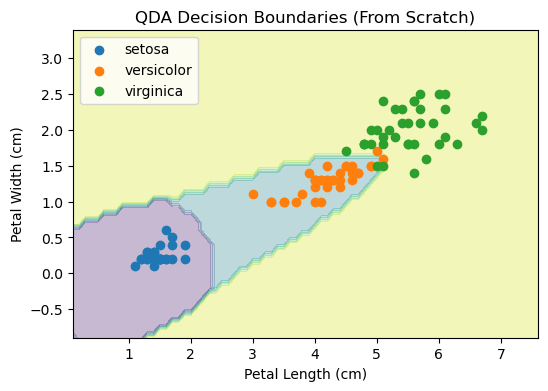

In [26]:
# Visualize QDA Decision Boundaries
plot_decision_boundaries(X_train, y_train, 
                         lambda X: predict_qda(X, means, covariances, priors),
                         "QDA Decision Boundaries (From Scratch)")

## 4️⃣ Verification with `Scikit-Learn`

In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda_sk = lda.predict(X_test)
print(f"Scikit-Learn LDA Accuracy: {accuracy_score(y_test, y_pred_lda_sk):.4f}")

Scikit-Learn LDA Accuracy: 1.0000


In [29]:
# Visualize LDA decision boundaries with scikit-learn
# plot_decision_boundaries(X_train, y_train, lda.predict, "Scikit-Learn LDA Decision Boundaries")

In [30]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda_sk = qda.predict(X_test)
print(f"Scikit-Learn QDA Accuracy: {accuracy_score(y_test, y_pred_qda_sk):.4f}")

Scikit-Learn QDA Accuracy: 1.0000


In [31]:
# Visualize QDA decision boundaries with scikit-learn
# plot_decision_boundaries(X_train, y_train, qda.predict, "Scikit-Learn QDA Decision Boundaries")

## 5️⃣ Practical Task

> **Task:** Apply your LDA and QDA implementations to the test set and analyze the results.
> 1. Compare the accuracies of your LDA and QDA implementations with scikit-learn's.
> 2. Visualize the decision boundaries on the test set.
> 3. Discuss: Why might one model perform better than the other on this dataset?

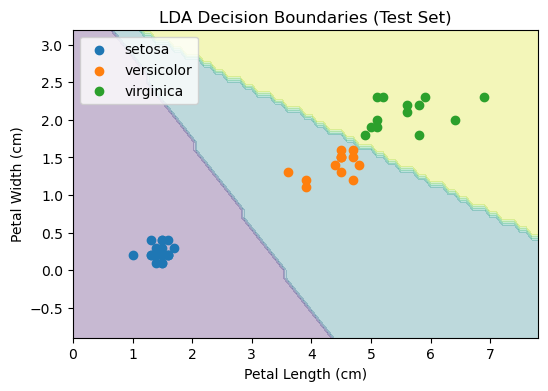

In [33]:
# Example: Visualize on test set
plot_decision_boundaries(X_test, y_test, 
                         lambda X: predict_lda(X, means, covariance, priors),
                         "LDA Decision Boundaries (Test Set)")

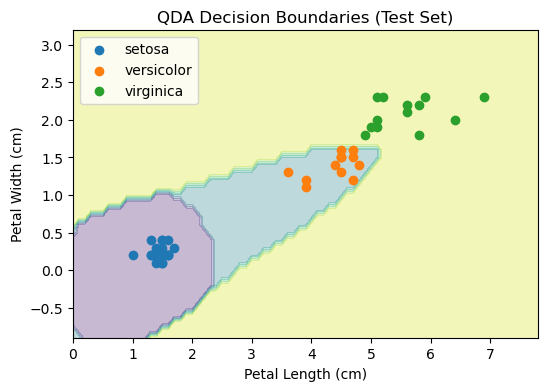

In [34]:
plot_decision_boundaries(X_test, y_test, 
                         lambda X: predict_qda(X, means, covariances, priors),
                         "QDA Decision Boundaries (Test Set)")

## 📚 Exercises

To deepen your understanding, try these optional exercises:
1. **Different Dataset:** Implement LDA and QDA for the Wine dataset (from `sklearn.datasets.load_wine`).
2. **Comparison:** Compare LDA and QDA with logistic regression (`sklearn.linear_model.LogisticRegression`).
3. **Feature Pairs:** Visualize decision boundaries using different feature pairs from the Iris dataset (e.g., sepal length vs width).
4. **Confusion Matrix:** Write a function to compute and display the confusion matrix for your predictions.